### Desafío - Análisis lineal discriminante

Nombres: María Eugenia Martínez - Rene Navarro - Juan Oyarce G

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


#### Descripción
Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable Binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : total del sando en la cuenta de crédito.
* student : Variable binaria. Registra si el cliente es estudiante o no.

### Ejercicio 1: Preparación de ambiente de trabajo
* Importe los módulos básicos para el análisis de datos.
* Importe las clases LabelEncoder , StandardScaler y LabelBinarizer de preprocessing
* Importe las funciones train_test_split y cross_val_score de model_selection
* Importe la función classification_report de metrics
* Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis .
* Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from IPython.display import display, Markdown
import missingno as msngo

import os
import glob
import operator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('default_credit.csv')
df.drop(df.columns[0], axis='columns', inplace= True)
df.head()



,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


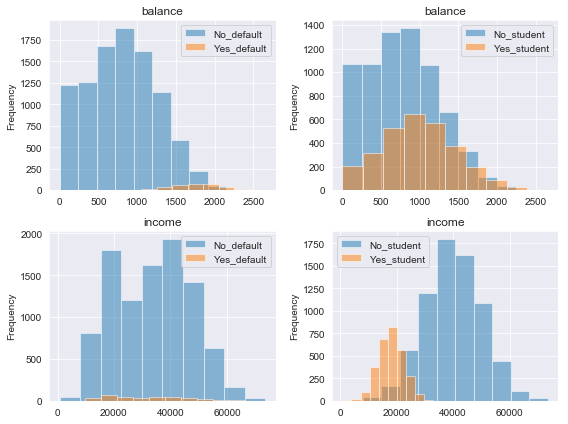

In [3]:
# Inspección gráfica distribución de los datos

plt.figure(figsize=(8, 6))

plt.subplot(221)
df.groupby('default')['balance'].plot(kind='hist', alpha=.5)
plt.legend(df['default'].unique()+'_default')
plt.title('balance')
plt.tight_layout()



plt.subplot(222)
df.groupby('student')['balance'].plot(kind='hist', alpha=.5)
plt.legend(df['student'].unique()+'_student')
plt.title('balance')
plt.tight_layout()


plt.subplot(223)
df.groupby('default')['income'].plot(kind='hist', alpha=.5)
plt.legend(df['default'].unique()+'_default')
plt.title('income')
plt.tight_layout()


plt.subplot(224)
df.groupby('student')['income'].plot(kind='hist', alpha=.5)
plt.legend(df['student'].unique()+'_student')
plt.title('income')
plt.tight_layout()

- La inspección visual de las variables ilustra que 'balance' se aproxima vagamente a una distribución normal en la clase de no morosos, para los morosos los datos presentan una asimetría considerablemente baja, respecto a los no_morosos y ambas clases se traslapan ligeramente en el extremo superior; en el caso de balance con student, se aprecia que  balance se aproxima bastante a una distribución normal en el caso de los estudiantes, por el contrario, en los no_estudiantes no se aprecia del mismo modo, ambas distribuciones se superponen. 



- El caso de income, tenemos que  en las clases no morosos, se aproxima a una distribución normal, para los morosos no se puede apreciar bien, porque la cantidad de datos es insuficiente, ambas distribuciones se suporponen. En el caso de student, income se comporta como una distribución practicamente normal, y aquellos que son estudiantes se superponen al inicio de la distribución de los no estudiantes, que son la mayoría de los casos.

 

### Ejercicio 2: Modelo base
* Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder .
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando classification_report .
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [4]:
# transformación label encoder
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])


In [5]:
# División del dataset en subcojuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'balance':'income'], df['default'], random_state=1986, test_size=.33)

In [6]:
# Model lda

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_hat = lda_model.predict(X_test)

In [7]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3188
           1       0.74      0.22      0.34       112

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.85      0.61      0.66      3300
weighted avg       0.97      0.97      0.96      3300



              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3188
           1       0.19      0.89      0.31       112

   micro avg       0.86      0.86      0.86      3300
   macro avg       0.59      0.88      0.62      3300
weighted avg       0.97      0.86      0.90      3300



None

Text(92.68, 0.5, 'predicted label')

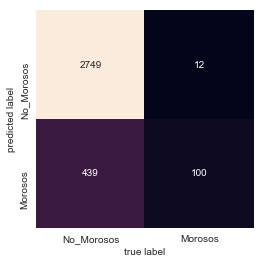

In [33]:
display(print(classification_report(y_test, y_hat)))
leyenda=['No_Morosos','Morosos']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')

- Se aprecia en el modelo que la precisión para clasificar a los no morosos es perfecta, debido al elevado número de verdaderos positivos, el recall es un poco menor
puesto que el modelo clasifica varios no morosos como falsos positivos; para el caso de los morosos la precisión es muy baja 0.19 puesto que hay un numero mayor  de falsos positivos que verdaderos negativos, no obtante el recall es mejor puesto que es bajo el número de falsos negativos. En general, la precision es  media (0.59), el recall alto (0.88) y el F1 score medio (0.62)


### Ejercicio 3: Refactorización 1 - información a priori
* Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
    * Asumamos que hay un 50/50 de morosos y no morosos.
    * Asumamos que hay un 60/40 de morosos y no morosos.
* Por cada modelo, reporte las métricas de clasificación.

In [10]:
# Model lda  (0.5 - 0.5)

lda_model = LinearDiscriminantAnalysis(priors=[0.5,0.5])
lda_model.fit(X_train, y_train)
y_hat = lda_model.predict(X_test)

In [11]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3188
           1       0.16      0.90      0.28       112

   micro avg       0.84      0.84      0.84      3300
   macro avg       0.58      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3188
           1       0.16      0.90      0.28       112

   micro avg       0.84      0.84      0.84      3300
   macro avg       0.58      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



None

Text(92.68, 0.5, 'predicted label')

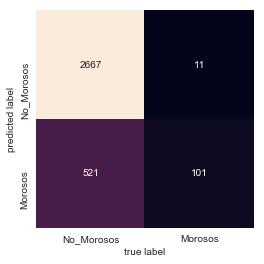

In [13]:
display(print(classification_report(y_test, y_hat)))
leyenda=['No_Morosos','Morosos']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')

- El modelo con el parametro prior de 0.5 de probabilidades para morosos y no morosos, presenta un desempeño bastante similar al modelo anterior, con la salvedad que disminuye la precisión al clasificar los morosos y aumenta ligeramente el recall de éstos, inclusiver un poco más bajo, ya que la precisión es de 0.58, el recall es de  0.87 y F1 de 0.59, ésto se debe al balanceo de clases, puesto que los morosos son solamente 112 casos y los no_morosos corresponden a 3188, es decir los morosos representa aproximadamente el 3 % del total de casos.  

In [16]:
# Model lda  (0.4 - 0.6)

lda_model = LinearDiscriminantAnalysis(priors=[0.4,0.6])
lda_model.fit(X_train, y_train)
y_hat = lda_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3188
           1       0.13      0.93      0.23       112

   micro avg       0.79      0.79      0.79      3300
   macro avg       0.56      0.86      0.56      3300
weighted avg       0.97      0.79      0.86      3300



              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3188
           1       0.13      0.93      0.23       112

   micro avg       0.79      0.79      0.79      3300
   macro avg       0.56      0.86      0.56      3300
weighted avg       0.97      0.79      0.86      3300



None

Text(92.68, 0.5, 'predicted label')

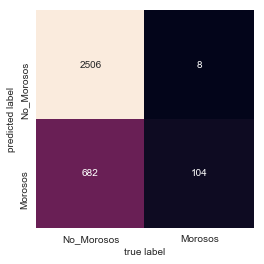

In [19]:
display(print(classification_report(y_test, y_hat)))
leyenda=['No_Morosos','Morosos']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')

- El modelo con el parametro prior de 0.4/0.6 de probabilidades para morosos y no morosos, presenta un desempeño un poco inferior  al modelo anterior, ya que la precisión es de 0.56, el recall es de  0.86 y F1 de 0.56, ésto se debe al balanceo de clases, puesto que los morosos son solamente 112 casos y los no_morosos corresponden a 3188, es decir los morosos representa aproximadamente el 3 % del total de casos.  

### Ejercicio 4: Refactorización 2 - oversampling
Digresión: Synthetic Over(Under)Sampling

* Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.
* Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.
* Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: 
    * En función a un subconjunto de datos correspondientes a la case minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante 
    
    $\mathbf{x}_{nuevoEjemplo} = \mathbf{x}_{i} + \lambda (\mathbf{x}_{zi} - \mathbf{x}_{i})$ 
    
    donde 
    $\mathbf{x}_{zi}$ 
    es un ejemplo de entrenamiento de la clase minoritaria y $\lambda$ es un parámetro de interpolación aleatorio $\lambda \sim \textsf{Uniforme}(0, 1)$.
    
    
* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling import SMOTE.

* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintáxis:

```python
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)
```

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su desempeño.

In [20]:
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

In [21]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_oversamp, y_train_oversamp)
y_hat = lda_model.predict(X_test)

In [22]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3188
           1       0.16      0.90      0.28       112

   micro avg       0.84      0.84      0.84      3300
   macro avg       0.58      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3188
           1       0.16      0.90      0.28       112

   micro avg       0.84      0.84      0.84      3300
   macro avg       0.58      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



None

Text(92.68, 0.5, 'predicted label')

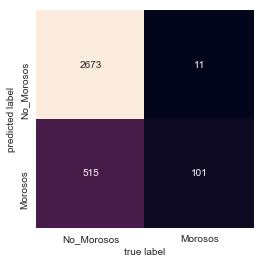

In [24]:
display(print(classification_report(y_test, y_hat)))
leyenda=['No_Morosos','Morosos']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')

- El modelo con resample para los morosos, presenta un desempeño bastante similar los modelos anteriores sin resampling, ya que la precisión es de 0.58, el recall es de  0.87 y F1 de 0.59, la precisión para clasificar los morosos se mantienen baja y el recall un poco mejor, pero los resultados no mejoran lo suficiente debido  al balanceo de clases, puesto que los morosos son solamente 112 casos y los no_morosos corresponden a 3188, es decir los morosos representa aproximadamente el 3 % del total de casos.

### Ejercicio 5: Refactorización 3 - QDA

* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos aumentados artificialmente. Genere las métricas de desempeño.
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [25]:
lda_model_quadratic = QuadraticDiscriminantAnalysis()
lda_model_quadratic.fit(X_train_oversamp, y_train_oversamp)
y_hat = lda_model_quadratic.predict(X_test)

In [26]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3188
           1       0.19      0.89      0.31       112

   micro avg       0.86      0.86      0.86      3300
   macro avg       0.59      0.88      0.62      3300
weighted avg       0.97      0.86      0.90      3300



              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3188
           1       0.19      0.89      0.31       112

   micro avg       0.86      0.86      0.86      3300
   macro avg       0.59      0.88      0.62      3300
weighted avg       0.97      0.86      0.90      3300



None

Text(92.68, 0.5, 'predicted label')

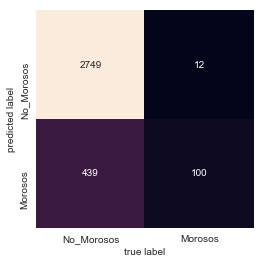

In [28]:
display(print(classification_report(y_test, y_hat)))
leyenda=['No_Morosos','Morosos']
mat = confusion_matrix(y_test, y_hat)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')

- El modelo cuadrático con resampling, presenta un desempeño ligeramente superior al  los modelos anteriores, ya que la precisión es de 0.59, el recall es de  0.88 y F1 de 0.62, la precisión para clasificar los morosos aumento ligeramente y el recall también, pero los resultados no mejoran lo suficiente debido  al balanceo de clases, puesto que los morosos son solamente 112 casos y los no_morosos corresponden a 3188, es decir los morosos representa aproximadamente el 3 % del total de casos. 


- En general, éste modelo, en conjunto con el modelo original lineal, sin probabilidades a priorir y sin resampling, son los que presentaron mejor desempeño.